In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urllib, json
import requests
import pandas as pd
from adjustText import adjust_text
%matplotlib inline

In [2]:
def load_closest_defender_dataset(path):
    curr_file = open(path)
    json_data = json.load(curr_file)
    result_data = json_data['resultSets'][0]
    headers = result_data['headers']
    shots = result_data['rowSet']
    data_frame = pd.DataFrame(data=shots, columns=headers)
    return data_frame

In [3]:
very_tight_d = load_closest_defender_dataset("../Data/nba_closest_defenders/player_shots_very_tight_defense.json")
tight_d = load_closest_defender_dataset("../Data/nba_closest_defenders/player_shots_tight_defense.json")
open_d = load_closest_defender_dataset("../Data/nba_closest_defenders/player_shots_open_defense.json")
wide_open_d = load_closest_defender_dataset("../Data/nba_closest_defenders/player_shots_wide_open_defense.json")
three_point_total = load_closest_defender_dataset("../Data/nba_closest_defenders/player_three_points_shots_total.json")

In [4]:
def add_total_three_pointers(data_frame):
    total_3_pointers = np.round(data_frame.FG3A * data_frame.GP)
    total_3_pointers = total_3_pointers.astype(np.int32)
    data_frame['FG3_TOTAL_SHOTS'] = total_3_pointers

In [10]:
def fetch_top_3_point_shooters_in_data(target_data_frame, top_x=20):
    top_20 = three_point_total.sort_values(by='FG3M_RANK', axis=0, ascending=True).iloc[:20]
    player_ids = top_20.PLAYER_ID.tolist()
    top_20_data = target_data_frame[target_data_frame.PLAYER_ID.isin(player_ids)]
    return top_20_data

In [5]:
add_total_three_pointers(very_tight_d)
add_total_three_pointers(tight_d)
add_total_three_pointers(open_d)
add_total_three_pointers(wide_open_d)

In [6]:
very_tight_top_20 = very_tight_d.sort_values(by='FG3_TOTAL_SHOTS', axis=0, ascending=False).iloc[:20, :]
tight_top_20 = tight_d.sort_values(by='FG3_TOTAL_SHOTS', axis=0, ascending=False).iloc[:20, :]
open_top_20 = open_d.sort_values(by='FG3_TOTAL_SHOTS', axis=0, ascending=False).iloc[:20, :]
wide_open_top_20 = wide_open_d.sort_values(by='FG3_TOTAL_SHOTS', axis=0, ascending=False).iloc[:20, :]

In [11]:
total_top_20_very_tight = fetch_top_3_point_shooters_in_data(very_tight_d)
total_top_20_tight = fetch_top_3_point_shooters_in_data(tight_d)
total_top_20_open = fetch_top_3_point_shooters_in_data(open_d)
total_top_20_wide_open = fetch_top_3_point_shooters_in_data(wide_open_d)

In [13]:
def plot_data_frame(data_frame, type_of_defense):    
    plt.figure(figsize=(13, 13))
    plt.scatter(x=data_frame.FG3_TOTAL_SHOTS, y=data_frame.FG3_PCT)
    plt.xlabel(s="Number of three point attempts")
    plt.ylabel(s="3pt percentage")
    plt.title(s="3pt % on " + type_of_defense + " defense")
    texts = []
    for i in range(len(data_frame)):
        texts.append(plt.text(data_frame.iloc[i].FG3_TOTAL_SHOTS, data_frame.iloc[i].FG3_PCT, 
                 s = data_frame.iloc[i].PLAYER_NAME))

    adjust_text(texts, x=data_frame.FG3_TOTAL_SHOTS, y=data_frame.FG3_PCT,expand_points=(0.3, 0.3))

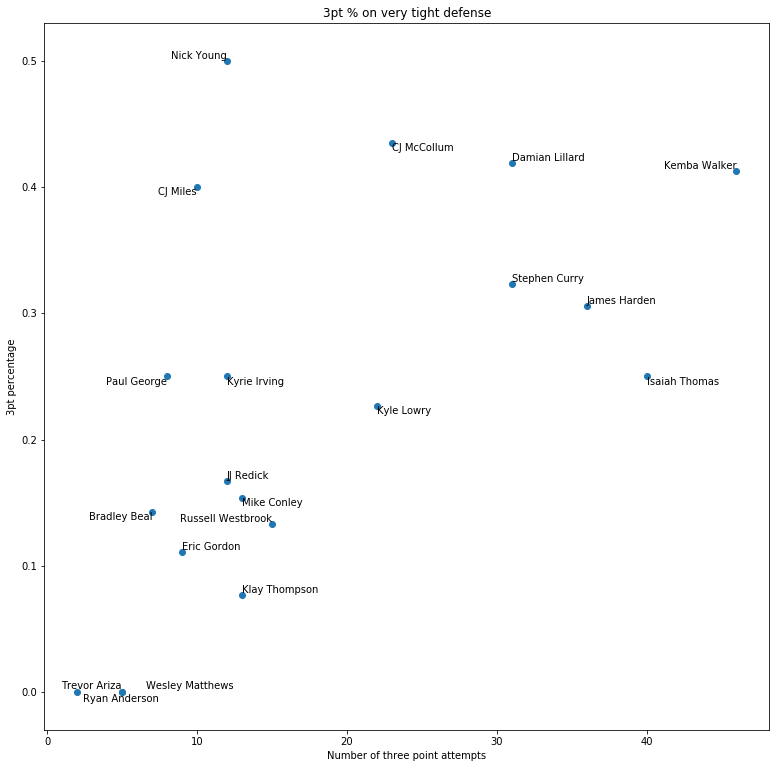

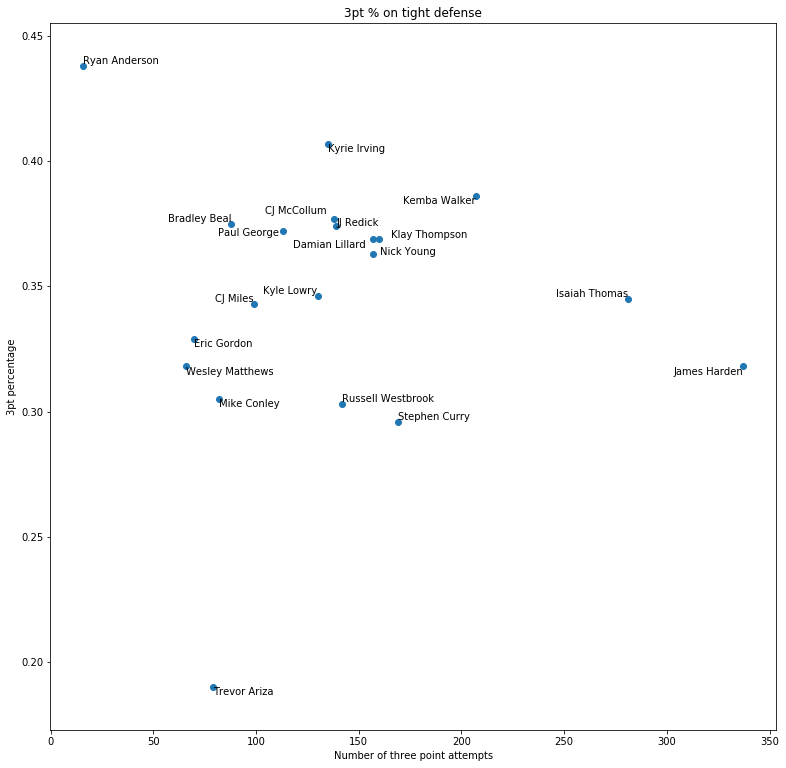

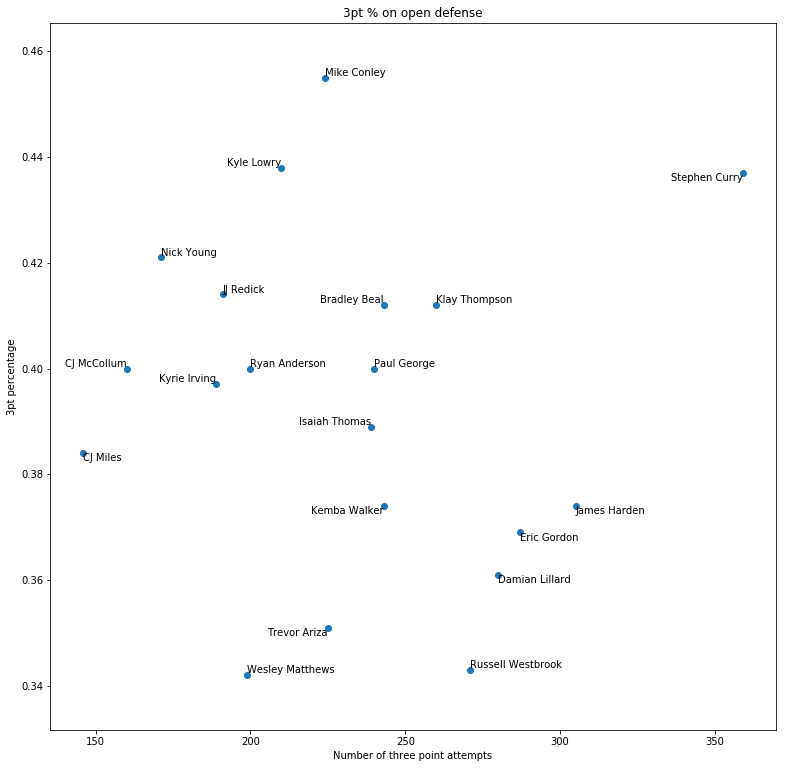

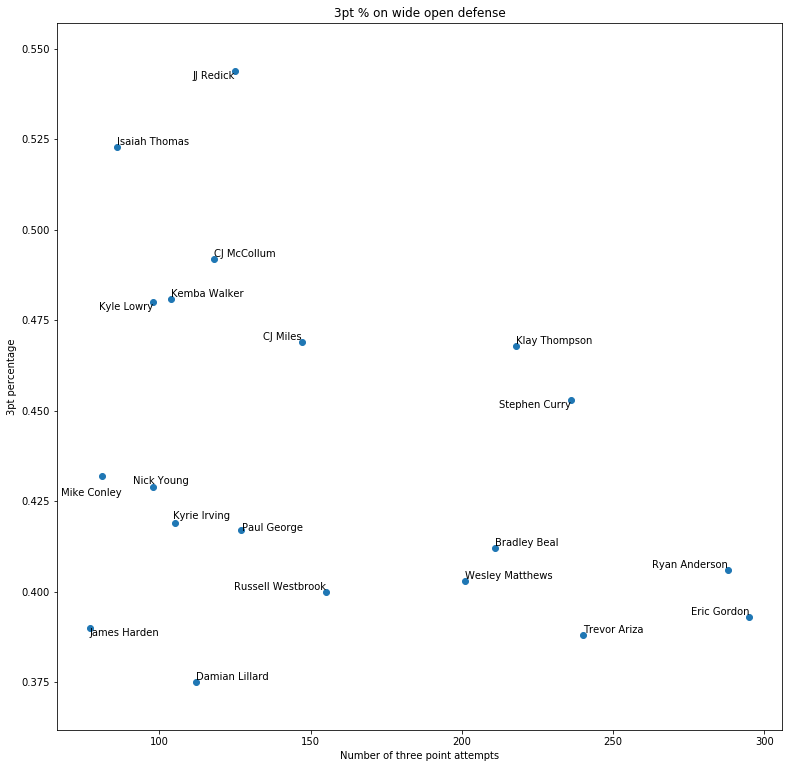

In [14]:
plot_data_frame(total_top_20_very_tight, "very tight")
plot_data_frame(total_top_20_tight, "tight")
plot_data_frame(total_top_20_open, "open")
plot_data_frame(total_top_20_wide_open, "wide open")
#plot_data_frame(tight_top_20, "tight")
#plot_data_frame(open_top_20, "open")
#plot_data_frame(wide_open_top_20, "wide open")